In [3]:
from utils import write_loss, get_config, Timer
from trainer import MUNIT_Trainer, UNIT_Trainer
import torch.backends.cudnn as cudnn
import torch

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys
import json
import numpy as np
from torch.utils.tensorboard import SummaryWriter
from fid_score import calculate_frechet_distance

from my_utils import (multiple_gpu_gen, multiple_gpu_dis,
                      load_dataset, LoaderSampler, tensor2img,
                      get_Z_pushed_loader_stats)

from IPython.display import clear_output

cudnn.benchmark = True

# Load experiment setting
opts_trainer = "MUNIT"
opts_output_path = "."
opts_resume = False
opts_config = "configs/handbags2shoes.yaml"


config = get_config(opts_config)
max_iter = config['max_iter']
display_size = config['display_size']
config['vgg_model_path'] = opts_output_path
batch_size = config['batch_size']

DEVICE_IDS = [0]
SEED = 0x000000

device = f'cuda:{DEVICE_IDS[0]}'

# Setup model and data loader
if opts_trainer == 'MUNIT':
    trainer = MUNIT_Trainer(config, device).to(device)
elif opts_trainer == 'UNIT':
    trainer = UNIT_Trainer(config).to(device)
else:
    sys.exit("Only support MUNIT|UNIT")

trainer.gen_a = multiple_gpu_gen(trainer.gen_a, DEVICE_IDS)
trainer.gen_b = multiple_gpu_gen(trainer.gen_b, DEVICE_IDS)

trainer.dis_a = multiple_gpu_dis(trainer.dis_a, DEVICE_IDS)
trainer.dis_b = multiple_gpu_dis(trainer.dis_b, DEVICE_IDS)

DATASET1, DATASET1_PATH = 'celeba_male', '../data/img_align_celeba'
DATASET2, DATASET2_PATH = 'celeba_female', '../data/img_align_celeba'

IMG_SIZE = 64

filename = 'stats/{}_{}_test.json'.format(DATASET2, IMG_SIZE)
with open(filename, 'r') as fp:
    data_stats = json.load(fp)
    mu_data, sigma_data = data_stats['mu'], data_stats['sigma']
del data_stats

torch.cuda.set_device(device)
torch.manual_seed(SEED)
np.random.seed(SEED)

train_loader_a, test_loader_a = load_dataset(DATASET1, DATASET1_PATH,
                                             img_size=IMG_SIZE, batch_size=batch_size)
train_loader_b, test_loader_b = load_dataset(DATASET2, DATASET2_PATH,
                                             img_size=IMG_SIZE, batch_size=batch_size)

X_sampler = LoaderSampler(train_loader_a)
X_test_sampler = LoaderSampler(test_loader_a)
Y_sampler = LoaderSampler(train_loader_b)
Y_test_sampler = LoaderSampler(test_loader_b)

torch.manual_seed(0xBADBEEF)
np.random.seed(0xBADBEEF)

X_fixed_arr = []
Y_fixed_arr = []
X_test_fixed_arr = []
Y_test_fixed_arr = []
for i in range(10):
    X_fixed_arr.append(X_sampler.sample(1))
    Y_fixed_arr.append(Y_sampler.sample(1))
    X_test_fixed_arr.append(X_test_sampler.sample(1))
    Y_test_fixed_arr.append(Y_test_sampler.sample(1))

X_fixed = torch.cat(X_fixed_arr)
Y_fixed = torch.cat(Y_fixed_arr)
X_test_fixed = torch.cat(X_test_fixed_arr)
Y_test_fixed = torch.cat(Y_test_fixed_arr)

print(f"X_fixed shape = {X_fixed.shape}")
print(f"Y_fixed shape = {Y_fixed.shape}")
# Setup logger and output folders
model_name = os.path.splitext(os.path.basename(opts_config))[0]

OUTPUT_PATH = '../checkpoints/MUNIT_nips/{}_{}_{}'.format(DATASET1, DATASET2, IMG_SIZE)
writer = SummaryWriter(os.path.join(OUTPUT_PATH, "tensorboard"))
path_to_save_fig = os.path.join(OUTPUT_PATH, "figs")
if not os.path.exists(path_to_save_fig):
    os.makedirs(path_to_save_fig)

path_to_save_models = os.path.join(OUTPUT_PATH, "models")
if not os.path.exists(path_to_save_models):
    os.makedirs(path_to_save_models)

X_fixed shape = torch.Size([10, 3, 64, 64])
Y_fixed shape = torch.Size([10, 3, 64, 64])


Plotting, step = 880001
Step 880001, gen_a2b, train


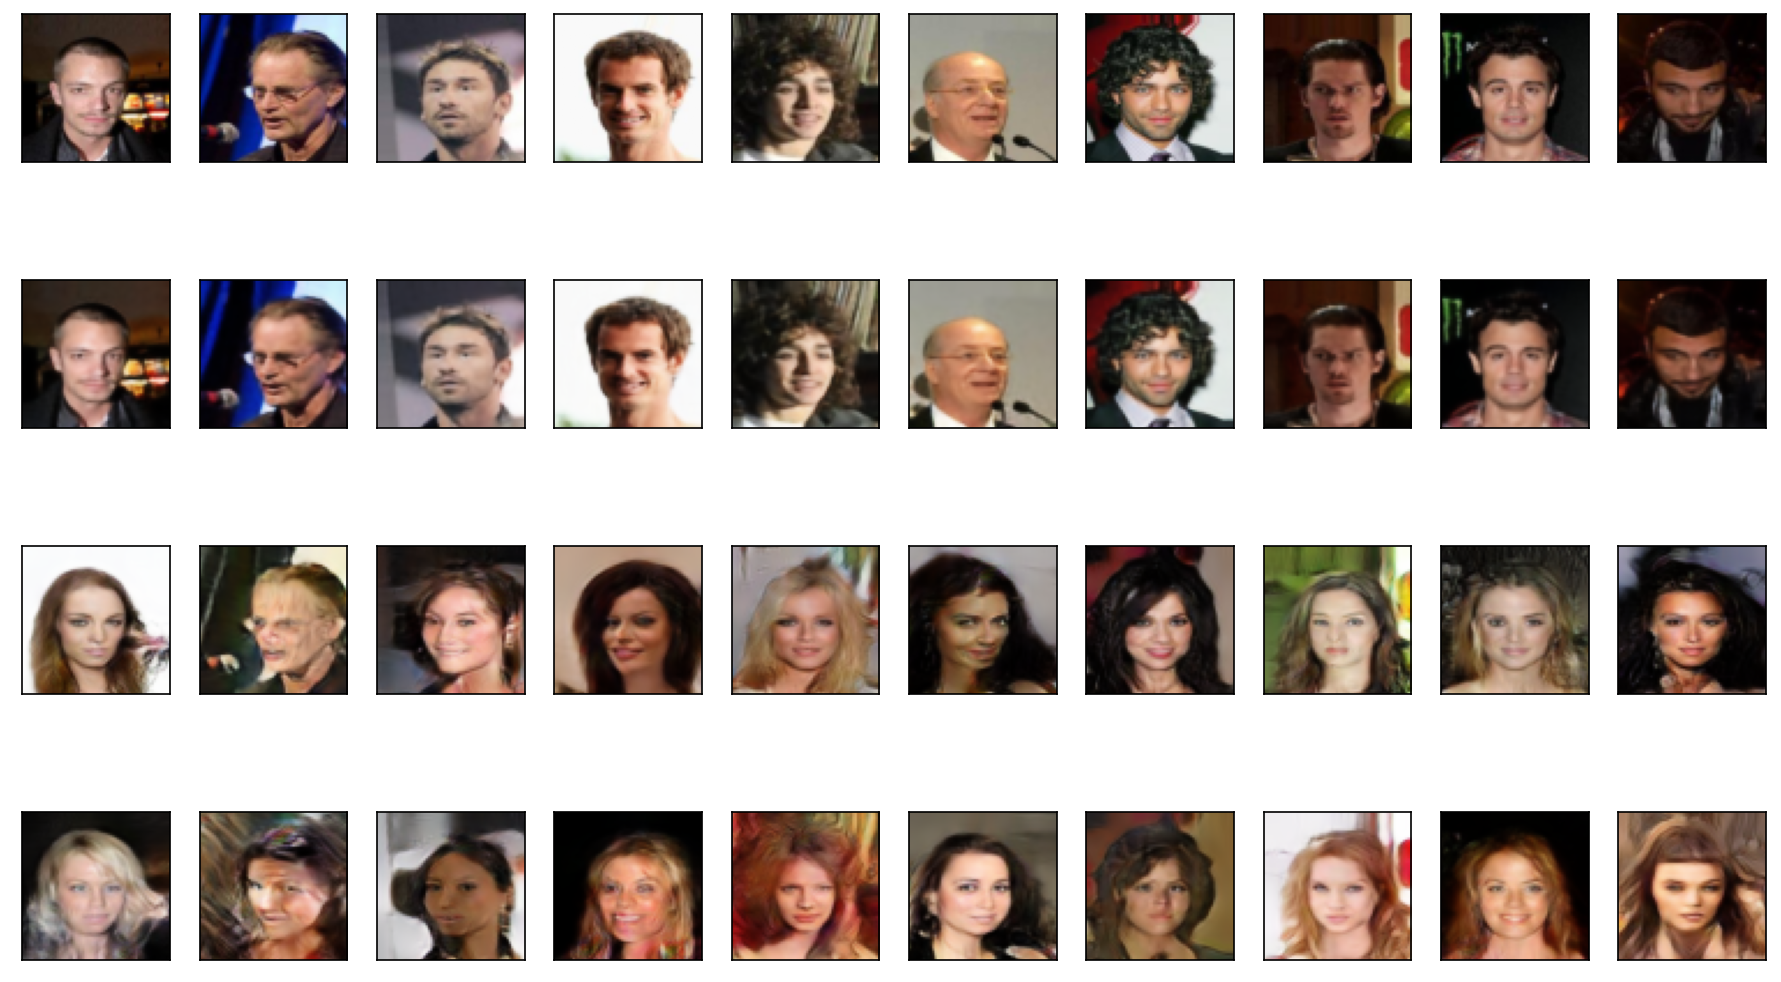

Step 880001, gen_a2b, test


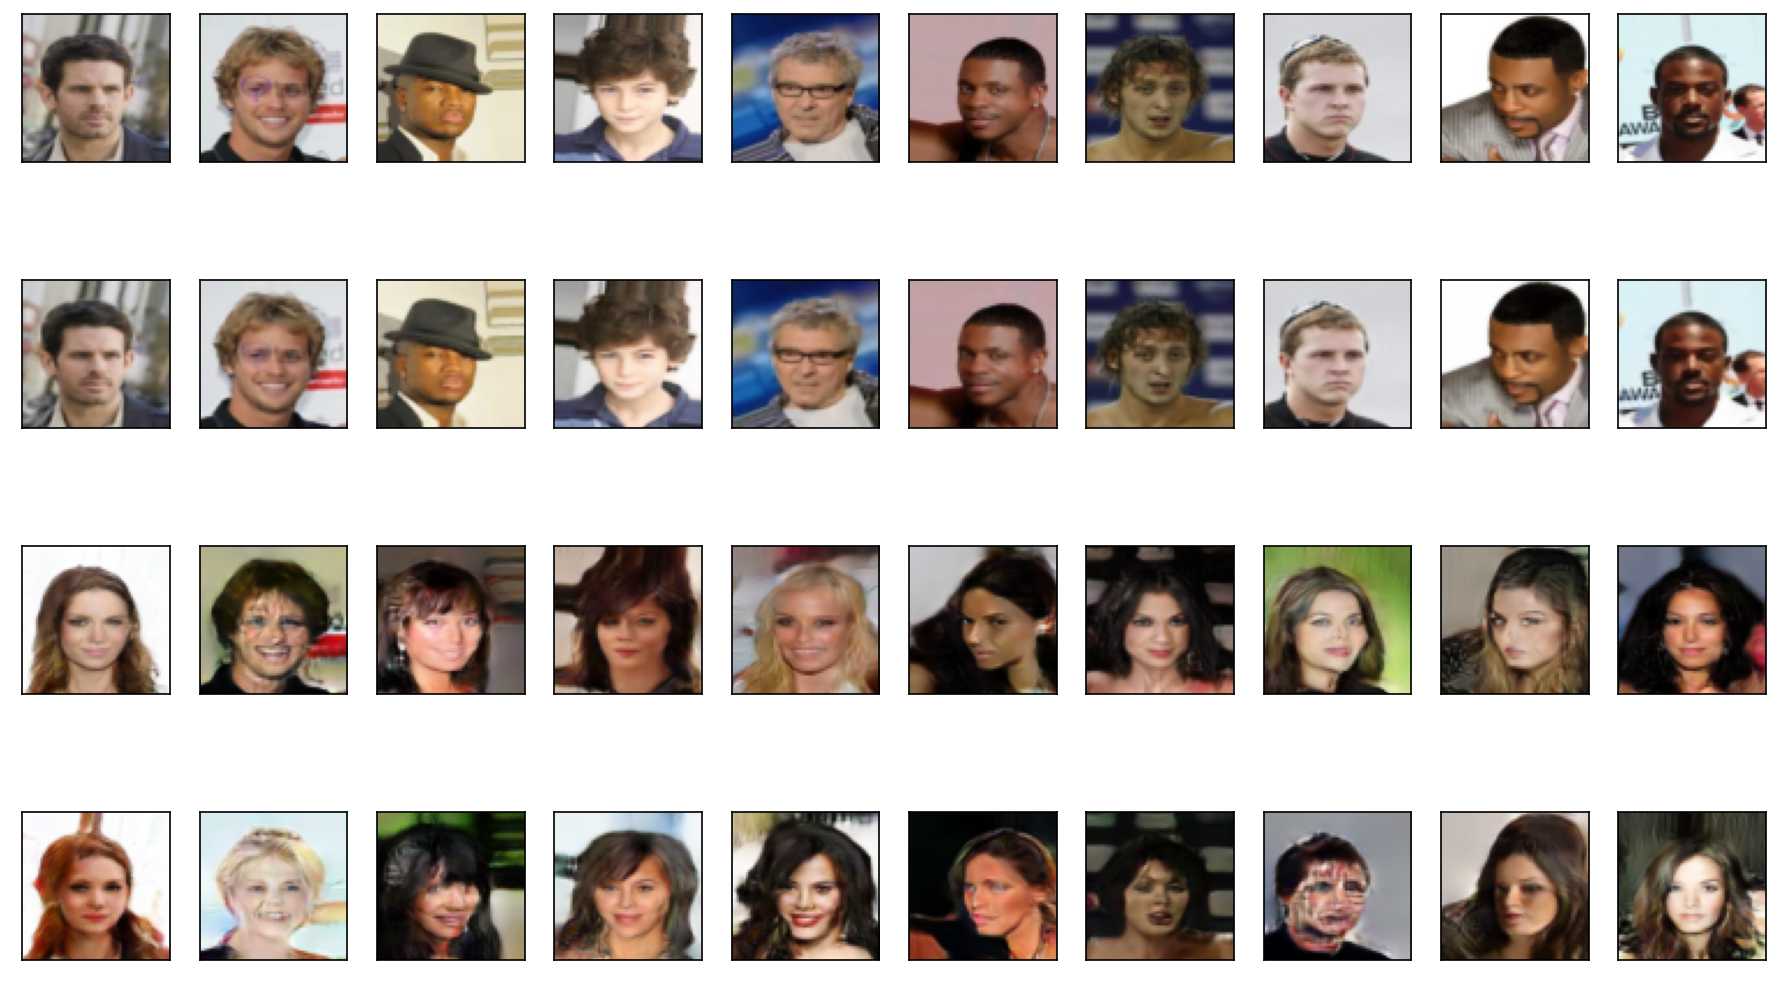

Step 880001, gen_b2a, train


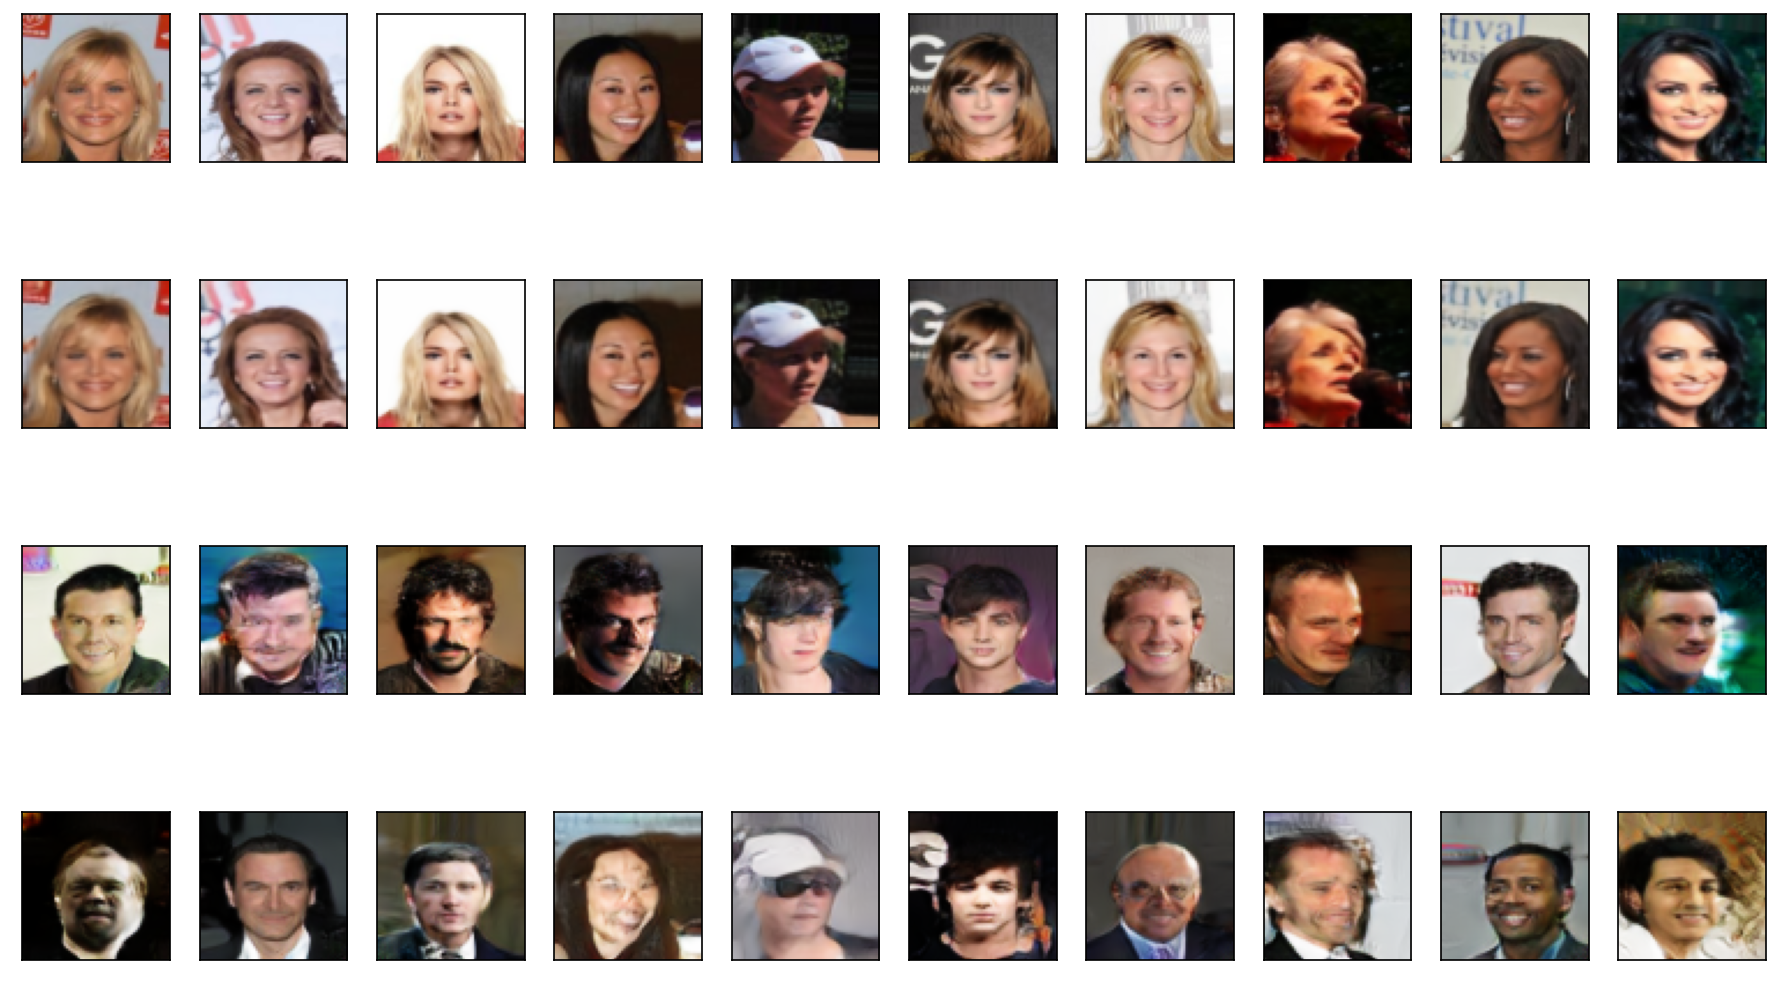

Step 880001, gen_b2a, test


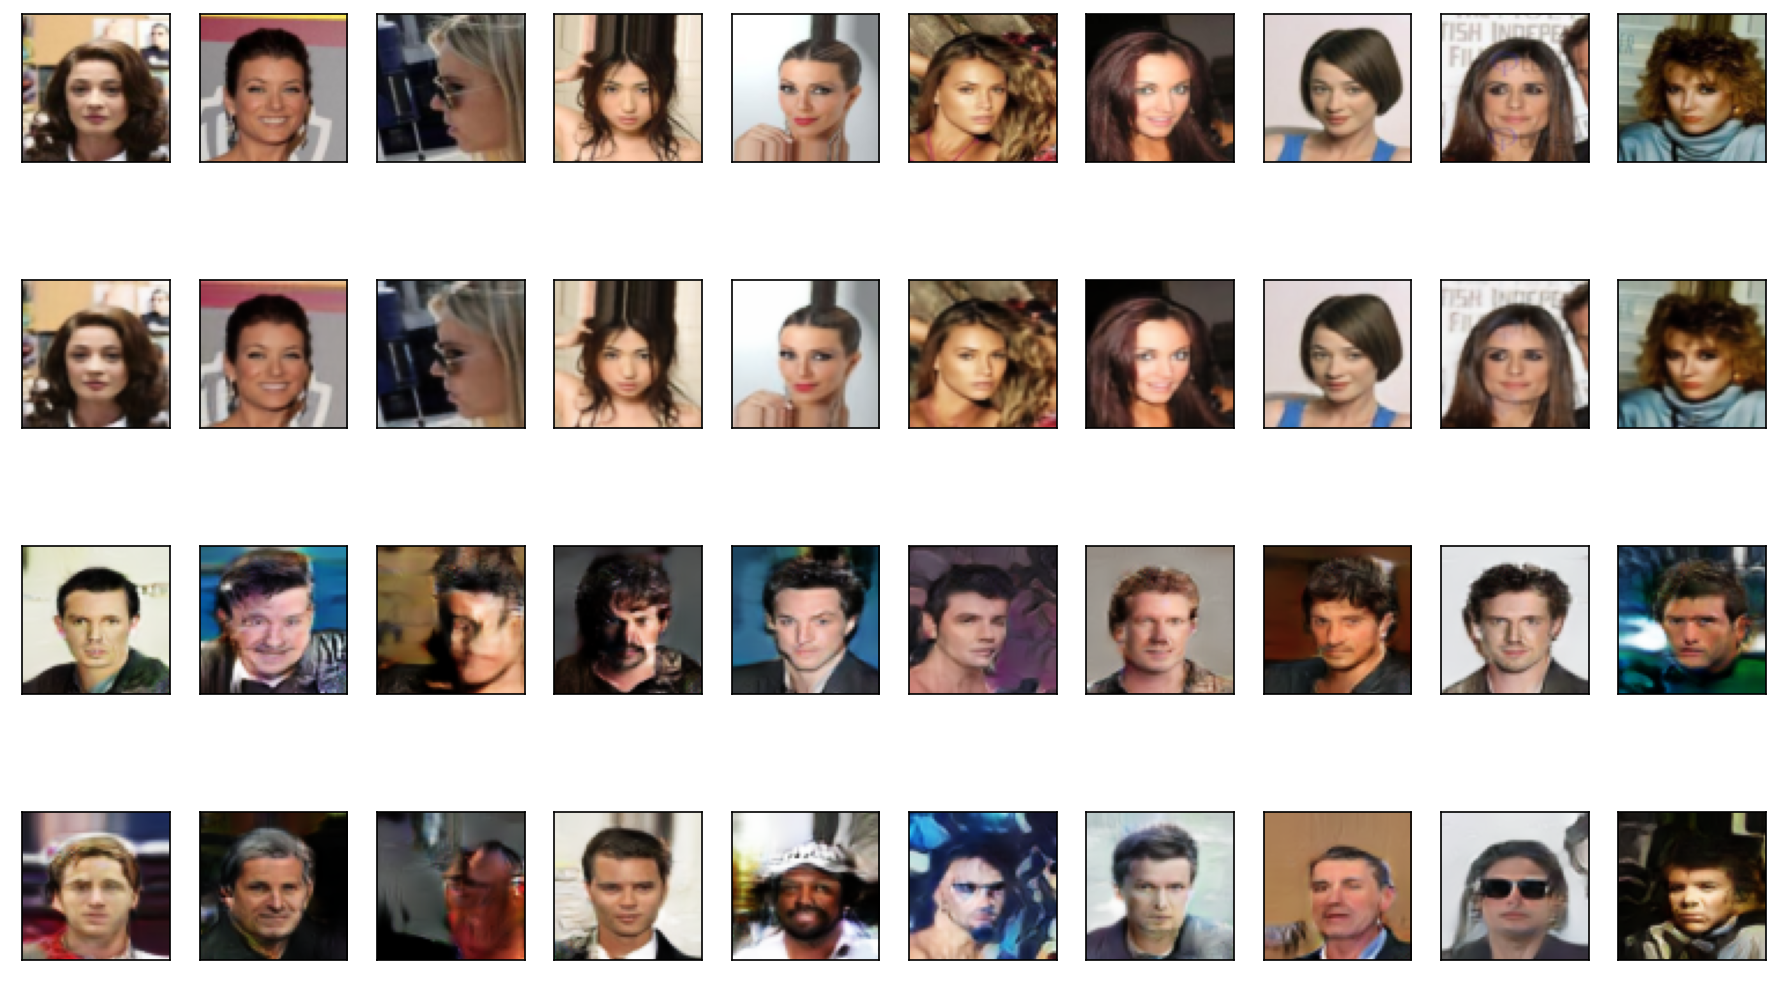

Computing FID
FID = 16.259152187776294, best_fid = 15.834820490941297, best iter = 790000
Elapsed time in update: 0.492768
Elapsed time in update: 0.116006
Elapsed time in update: 0.116726
Elapsed time in update: 0.114006
Elapsed time in update: 0.121073
Elapsed time in update: 0.113841
Elapsed time in update: 0.112074
Elapsed time in update: 0.112282
Elapsed time in update: 0.115602
Elapsed time in update: 0.114501
Iteration: 00880011/01000000
Elapsed time in update: 0.113212
Elapsed time in update: 0.128932
Elapsed time in update: 0.121275
Elapsed time in update: 0.122567
Elapsed time in update: 0.126235
Elapsed time in update: 0.136578
Elapsed time in update: 0.123682
Elapsed time in update: 0.116094
Elapsed time in update: 0.129741
Elapsed time in update: 0.114323
Iteration: 00880021/01000000
Elapsed time in update: 0.133042
Elapsed time in update: 0.136791
Elapsed time in update: 0.124154
Elapsed time in update: 0.131457
Elapsed time in update: 0.132493
Elapsed time in update: 0.1

Elapsed time in update: 0.125048
Elapsed time in update: 0.143072
Iteration: 00880231/01000000
Elapsed time in update: 0.112817
Elapsed time in update: 0.131193
Elapsed time in update: 0.117015
Elapsed time in update: 0.117442
Elapsed time in update: 0.114059
Elapsed time in update: 0.113813
Elapsed time in update: 0.115430
Elapsed time in update: 0.118277
Elapsed time in update: 0.126991
Elapsed time in update: 0.116495
Iteration: 00880241/01000000
Elapsed time in update: 0.133360
Elapsed time in update: 0.123986
Elapsed time in update: 0.160508
Elapsed time in update: 0.159968
Elapsed time in update: 0.144953
Elapsed time in update: 0.118580
Elapsed time in update: 0.124536
Elapsed time in update: 0.134167
Elapsed time in update: 0.117685
Elapsed time in update: 0.122572
Iteration: 00880251/01000000
Elapsed time in update: 0.113111
Elapsed time in update: 0.118488
Elapsed time in update: 0.126575
Elapsed time in update: 0.116901
Elapsed time in update: 0.126169
Elapsed time in update

Elapsed time in update: 0.238791
Elapsed time in update: 0.288718
Elapsed time in update: 0.319574
Iteration: 00880461/01000000
Elapsed time in update: 0.246234
Elapsed time in update: 0.290526
Elapsed time in update: 0.317643
Elapsed time in update: 0.295949
Elapsed time in update: 0.307057
Elapsed time in update: 0.283704
Elapsed time in update: 0.239134
Elapsed time in update: 0.233634
Elapsed time in update: 0.163399
Elapsed time in update: 0.165765
Iteration: 00880471/01000000
Elapsed time in update: 0.172839
Elapsed time in update: 0.249430
Elapsed time in update: 0.251878
Elapsed time in update: 0.172189
Elapsed time in update: 0.277997
Elapsed time in update: 0.312245
Elapsed time in update: 0.218218
Elapsed time in update: 0.306458
Elapsed time in update: 0.201758
Elapsed time in update: 0.301888
Iteration: 00880481/01000000
Elapsed time in update: 0.302563
Elapsed time in update: 0.264475
Elapsed time in update: 0.229992
Elapsed time in update: 0.135750
Elapsed time in update

Elapsed time in update: 0.124195
Elapsed time in update: 0.117247
Elapsed time in update: 0.115426
Elapsed time in update: 0.115102
Iteration: 00880691/01000000
Elapsed time in update: 0.117054
Elapsed time in update: 0.118001
Elapsed time in update: 0.115216
Elapsed time in update: 0.113151
Elapsed time in update: 0.116261
Elapsed time in update: 0.117646
Elapsed time in update: 0.116976
Elapsed time in update: 0.115278
Elapsed time in update: 0.115749
Elapsed time in update: 0.121484
Iteration: 00880701/01000000
Elapsed time in update: 0.116825
Elapsed time in update: 0.116558
Elapsed time in update: 0.121141
Elapsed time in update: 0.117131
Elapsed time in update: 0.129327
Elapsed time in update: 0.121689
Elapsed time in update: 0.119659
Elapsed time in update: 0.121511
Elapsed time in update: 0.119315
Elapsed time in update: 0.114929
Iteration: 00880711/01000000
Elapsed time in update: 0.117054
Elapsed time in update: 0.116820
Elapsed time in update: 0.116766
Elapsed time in update

Elapsed time in update: 0.121222
Elapsed time in update: 0.127995
Elapsed time in update: 0.124734
Elapsed time in update: 0.120094
Elapsed time in update: 0.123817
Iteration: 00880921/01000000
Elapsed time in update: 0.138805
Elapsed time in update: 0.155267
Elapsed time in update: 0.137398
Elapsed time in update: 0.144600
Elapsed time in update: 0.123972
Elapsed time in update: 0.133738
Elapsed time in update: 0.128877
Elapsed time in update: 0.118618
Elapsed time in update: 0.127449
Elapsed time in update: 0.119343
Iteration: 00880931/01000000
Elapsed time in update: 0.116701
Elapsed time in update: 0.114707
Elapsed time in update: 0.112373
Elapsed time in update: 0.117518
Elapsed time in update: 0.111766
Elapsed time in update: 0.113075
Elapsed time in update: 0.115424
Elapsed time in update: 0.112561
Elapsed time in update: 0.112232
Elapsed time in update: 0.116810
Iteration: 00880941/01000000
Elapsed time in update: 0.151498
Elapsed time in update: 0.125643
Elapsed time in update

Elapsed time in update: 0.112309
Elapsed time in update: 0.113547
Elapsed time in update: 0.113487
Elapsed time in update: 0.117601
Elapsed time in update: 0.128810
Elapsed time in update: 0.129245
Iteration: 00881151/01000000
Elapsed time in update: 0.125847
Elapsed time in update: 0.133701
Elapsed time in update: 0.116814
Elapsed time in update: 0.116739
Elapsed time in update: 0.125954
Elapsed time in update: 0.128999
Elapsed time in update: 0.120884
Elapsed time in update: 0.124822
Elapsed time in update: 0.141106
Elapsed time in update: 0.151627
Iteration: 00881161/01000000
Elapsed time in update: 0.123074
Elapsed time in update: 0.121507
Elapsed time in update: 0.118850
Elapsed time in update: 0.120131
Elapsed time in update: 0.117038
Elapsed time in update: 0.116663
Elapsed time in update: 0.121639
Elapsed time in update: 0.112704
Elapsed time in update: 0.116179
Elapsed time in update: 0.114302
Iteration: 00881171/01000000
Elapsed time in update: 0.113981
Elapsed time in update

Elapsed time in update: 0.113259
Elapsed time in update: 0.119173
Elapsed time in update: 0.115011
Elapsed time in update: 0.113790
Elapsed time in update: 0.116517
Elapsed time in update: 0.113091
Iteration: 00881381/01000000
Elapsed time in update: 0.118169
Elapsed time in update: 0.114030
Elapsed time in update: 0.114167
Elapsed time in update: 0.116024
Elapsed time in update: 0.114049
Elapsed time in update: 0.119167
Elapsed time in update: 0.118575
Elapsed time in update: 0.115555
Elapsed time in update: 0.133859
Elapsed time in update: 0.129645
Iteration: 00881391/01000000
Elapsed time in update: 0.142374
Elapsed time in update: 0.122662
Elapsed time in update: 0.120261
Elapsed time in update: 0.119384
Elapsed time in update: 0.116894
Elapsed time in update: 0.115924
Elapsed time in update: 0.121553
Elapsed time in update: 0.115436
Elapsed time in update: 0.113426
Elapsed time in update: 0.113905
Iteration: 00881401/01000000
Elapsed time in update: 0.113514
Elapsed time in update

Elapsed time in update: 0.123542
Elapsed time in update: 0.119015
Elapsed time in update: 0.117585
Elapsed time in update: 0.116228
Elapsed time in update: 0.117379
Elapsed time in update: 0.112533
Iteration: 00881611/01000000
Elapsed time in update: 0.113612
Elapsed time in update: 0.113707
Elapsed time in update: 0.112998
Elapsed time in update: 0.115526
Elapsed time in update: 0.112064
Elapsed time in update: 0.113197
Elapsed time in update: 0.113187
Elapsed time in update: 0.112612
Elapsed time in update: 0.115454
Elapsed time in update: 0.130709
Iteration: 00881621/01000000
Elapsed time in update: 0.134872
Elapsed time in update: 0.126760
Elapsed time in update: 0.123952
Elapsed time in update: 0.129439
Elapsed time in update: 0.131614
Elapsed time in update: 0.123880
Elapsed time in update: 0.122457
Elapsed time in update: 0.117904
Elapsed time in update: 0.116984
Elapsed time in update: 0.113966
Iteration: 00881631/01000000
Elapsed time in update: 0.114954
Elapsed time in update

Elapsed time in update: 0.152553
Elapsed time in update: 0.122474
Elapsed time in update: 0.125049
Elapsed time in update: 0.135782
Elapsed time in update: 0.144154
Elapsed time in update: 0.157028
Iteration: 00881841/01000000
Elapsed time in update: 0.142576
Elapsed time in update: 0.118798
Elapsed time in update: 0.114737
Elapsed time in update: 0.115097
Elapsed time in update: 0.113823
Elapsed time in update: 0.114950
Elapsed time in update: 0.113680
Elapsed time in update: 0.113528
Elapsed time in update: 0.112749
Elapsed time in update: 0.113495
Iteration: 00881851/01000000
Elapsed time in update: 0.113715
Elapsed time in update: 0.113118
Elapsed time in update: 0.113496
Elapsed time in update: 0.153842
Elapsed time in update: 0.114198
Elapsed time in update: 0.115451
Elapsed time in update: 0.113860
Elapsed time in update: 0.147570
Elapsed time in update: 0.153410
Elapsed time in update: 0.160905
Iteration: 00881861/01000000
Elapsed time in update: 0.158201
Elapsed time in update

Elapsed time in update: 0.127973
Elapsed time in update: 0.216370
Elapsed time in update: 0.347136
Elapsed time in update: 0.151702
Elapsed time in update: 0.142175
Elapsed time in update: 0.155140
Iteration: 00882071/01000000
Elapsed time in update: 0.160071
Elapsed time in update: 0.134054
Elapsed time in update: 0.137451
Elapsed time in update: 0.135929
Elapsed time in update: 0.134893
Elapsed time in update: 0.133875
Elapsed time in update: 0.136455
Elapsed time in update: 0.133207
Elapsed time in update: 0.134682
Elapsed time in update: 0.132068
Iteration: 00882081/01000000
Elapsed time in update: 0.135207
Elapsed time in update: 0.132189
Elapsed time in update: 0.131344
Elapsed time in update: 0.130815
Elapsed time in update: 0.131617
Elapsed time in update: 0.130698
Elapsed time in update: 0.135392
Elapsed time in update: 0.135678
Elapsed time in update: 0.134931
Elapsed time in update: 0.141367
Iteration: 00882091/01000000
Elapsed time in update: 0.127789
Elapsed time in update

Elapsed time in update: 0.112850
Elapsed time in update: 0.113457
Elapsed time in update: 0.115507
Elapsed time in update: 0.112797
Elapsed time in update: 0.113872
Elapsed time in update: 0.113323
Iteration: 00882301/01000000
Elapsed time in update: 0.117320
Elapsed time in update: 0.114581
Elapsed time in update: 0.117729
Elapsed time in update: 0.114964
Elapsed time in update: 0.115397
Elapsed time in update: 0.113326
Elapsed time in update: 0.111945
Elapsed time in update: 0.113377
Elapsed time in update: 0.114467
Elapsed time in update: 0.114919
Iteration: 00882311/01000000
Elapsed time in update: 0.118944
Elapsed time in update: 0.119674
Elapsed time in update: 0.119677
Elapsed time in update: 0.116170
Elapsed time in update: 0.114306
Elapsed time in update: 0.116892
Elapsed time in update: 0.114876
Elapsed time in update: 0.127366
Elapsed time in update: 0.121352
Elapsed time in update: 0.145805
Iteration: 00882321/01000000
Elapsed time in update: 0.128680
Elapsed time in update

Elapsed time in update: 0.132653
Elapsed time in update: 0.134073
Elapsed time in update: 0.146098
Elapsed time in update: 0.117745
Elapsed time in update: 0.137803
Elapsed time in update: 0.130154
Iteration: 00882531/01000000
Elapsed time in update: 0.126334
Elapsed time in update: 0.127249
Elapsed time in update: 0.118730
Elapsed time in update: 0.113709
Elapsed time in update: 0.131856
Elapsed time in update: 0.114434
Elapsed time in update: 0.117990
Elapsed time in update: 0.113973
Elapsed time in update: 0.111689
Elapsed time in update: 0.114559
Iteration: 00882541/01000000
Elapsed time in update: 0.122187
Elapsed time in update: 0.115384
Elapsed time in update: 0.116967
Elapsed time in update: 0.127999
Elapsed time in update: 0.118026
Elapsed time in update: 0.124599
Elapsed time in update: 0.113884
Elapsed time in update: 0.112927
Elapsed time in update: 0.115903
Elapsed time in update: 0.116594
Iteration: 00882551/01000000
Elapsed time in update: 0.112690
Elapsed time in update

Elapsed time in update: 0.112901
Elapsed time in update: 0.118501
Elapsed time in update: 0.119824
Elapsed time in update: 0.114903
Elapsed time in update: 0.114160
Elapsed time in update: 0.114696
Iteration: 00882761/01000000
Elapsed time in update: 0.116510
Elapsed time in update: 0.116035
Elapsed time in update: 0.114089
Elapsed time in update: 0.112916
Elapsed time in update: 0.116981
Elapsed time in update: 0.114870
Elapsed time in update: 0.113338
Elapsed time in update: 0.113974
Elapsed time in update: 0.114626
Elapsed time in update: 0.117526
Iteration: 00882771/01000000
Elapsed time in update: 0.114165
Elapsed time in update: 0.111953
Elapsed time in update: 0.115361
Elapsed time in update: 0.117760
Elapsed time in update: 0.132930
Elapsed time in update: 0.131013
Elapsed time in update: 0.131269
Elapsed time in update: 0.113488
Elapsed time in update: 0.112353
Elapsed time in update: 0.113010
Iteration: 00882781/01000000
Elapsed time in update: 0.113726
Elapsed time in update

Elapsed time in update: 0.115579
Elapsed time in update: 0.115585
Elapsed time in update: 0.120076
Elapsed time in update: 0.115392
Elapsed time in update: 0.115745
Elapsed time in update: 0.117558
Iteration: 00882991/01000000
Elapsed time in update: 0.119164
Elapsed time in update: 0.116622
Elapsed time in update: 0.116508
Elapsed time in update: 0.115772
Elapsed time in update: 0.120730
Elapsed time in update: 0.114971
Elapsed time in update: 0.113224
Elapsed time in update: 0.112034
Elapsed time in update: 0.116707
Elapsed time in update: 0.118607
Iteration: 00883001/01000000
Elapsed time in update: 0.115267
Elapsed time in update: 0.112764
Elapsed time in update: 0.115771
Elapsed time in update: 0.114034
Elapsed time in update: 0.114017
Elapsed time in update: 0.110991
Elapsed time in update: 0.115138
Elapsed time in update: 0.130108
Elapsed time in update: 0.145819
Elapsed time in update: 0.112656
Iteration: 00883011/01000000
Elapsed time in update: 0.112952
Elapsed time in update

Elapsed time in update: 0.111552
Elapsed time in update: 0.114706
Elapsed time in update: 0.114842
Elapsed time in update: 0.119446
Elapsed time in update: 0.116211
Elapsed time in update: 0.115962
Iteration: 00883221/01000000
Elapsed time in update: 0.114097
Elapsed time in update: 0.115005
Elapsed time in update: 0.114950
Elapsed time in update: 0.114209
Elapsed time in update: 0.114587
Elapsed time in update: 0.115213
Elapsed time in update: 0.115155
Elapsed time in update: 0.116971
Elapsed time in update: 0.114642
Elapsed time in update: 0.118935
Iteration: 00883231/01000000
Elapsed time in update: 0.117668
Elapsed time in update: 0.112764
Elapsed time in update: 0.113229
Elapsed time in update: 0.116406
Elapsed time in update: 0.115193
Elapsed time in update: 0.114350
Elapsed time in update: 0.119237
Elapsed time in update: 0.113193
Elapsed time in update: 0.112393
Elapsed time in update: 0.113577
Iteration: 00883241/01000000
Elapsed time in update: 0.115587
Elapsed time in update

Elapsed time in update: 0.111223
Elapsed time in update: 0.112280
Elapsed time in update: 0.115883
Elapsed time in update: 0.116374
Elapsed time in update: 0.114462
Elapsed time in update: 0.113156
Iteration: 00883451/01000000
Elapsed time in update: 0.115680
Elapsed time in update: 0.116136
Elapsed time in update: 0.114822
Elapsed time in update: 0.118571
Elapsed time in update: 0.117531
Elapsed time in update: 0.115745
Elapsed time in update: 0.114658
Elapsed time in update: 0.112411
Elapsed time in update: 0.206381
Elapsed time in update: 0.118470
Iteration: 00883461/01000000
Elapsed time in update: 0.112337
Elapsed time in update: 0.115266
Elapsed time in update: 0.122527
Elapsed time in update: 0.117816
Elapsed time in update: 0.177717
Elapsed time in update: 0.165357
Elapsed time in update: 0.248576
Elapsed time in update: 0.244201
Elapsed time in update: 0.270899
Elapsed time in update: 0.271149
Iteration: 00883471/01000000
Elapsed time in update: 0.244316
Elapsed time in update

Elapsed time in update: 0.117333
Elapsed time in update: 0.116110
Elapsed time in update: 0.113959
Elapsed time in update: 0.112166
Elapsed time in update: 0.118177
Elapsed time in update: 0.116956
Iteration: 00883681/01000000
Elapsed time in update: 0.114248
Elapsed time in update: 0.112078
Elapsed time in update: 0.112692
Elapsed time in update: 0.118415
Elapsed time in update: 0.112374
Elapsed time in update: 0.112468
Elapsed time in update: 0.113836
Elapsed time in update: 0.116926
Elapsed time in update: 0.114820
Elapsed time in update: 0.111916
Iteration: 00883691/01000000
Elapsed time in update: 0.113191
Elapsed time in update: 0.121423
Elapsed time in update: 0.116184
Elapsed time in update: 0.111876
Elapsed time in update: 0.112590
Elapsed time in update: 0.111382
Elapsed time in update: 0.113269
Elapsed time in update: 0.113084
Elapsed time in update: 0.118186
Elapsed time in update: 0.116044
Iteration: 00883701/01000000
Elapsed time in update: 0.118600
Elapsed time in update

Elapsed time in update: 0.131470
Elapsed time in update: 0.130033
Elapsed time in update: 0.135843
Elapsed time in update: 0.135998
Elapsed time in update: 0.131690
Elapsed time in update: 0.125696
Iteration: 00883911/01000000
Elapsed time in update: 0.115705
Elapsed time in update: 0.115324
Elapsed time in update: 0.111387
Elapsed time in update: 0.111284
Elapsed time in update: 0.118009
Elapsed time in update: 0.115456
Elapsed time in update: 0.111897
Elapsed time in update: 0.112523
Elapsed time in update: 0.114803
Elapsed time in update: 0.116048
Iteration: 00883921/01000000
Elapsed time in update: 0.113630
Elapsed time in update: 0.112307
Elapsed time in update: 0.112227
Elapsed time in update: 0.111663
Elapsed time in update: 0.112802
Elapsed time in update: 0.112916
Elapsed time in update: 0.111303
Elapsed time in update: 0.117186
Elapsed time in update: 0.114539
Elapsed time in update: 0.112384
Iteration: 00883931/01000000
Elapsed time in update: 0.111749
Elapsed time in update

Elapsed time in update: 0.137836
Elapsed time in update: 0.120980
Elapsed time in update: 0.111968
Elapsed time in update: 0.111370
Elapsed time in update: 0.112415
Elapsed time in update: 0.114936
Iteration: 00884141/01000000
Elapsed time in update: 0.114552
Elapsed time in update: 0.114966
Elapsed time in update: 0.112540
Elapsed time in update: 0.112526
Elapsed time in update: 0.114457
Elapsed time in update: 0.112303
Elapsed time in update: 0.112623
Elapsed time in update: 0.113505
Elapsed time in update: 0.116315
Elapsed time in update: 0.113447
Iteration: 00884151/01000000
Elapsed time in update: 0.112556
Elapsed time in update: 0.112648
Elapsed time in update: 0.115625
Elapsed time in update: 0.113585
Elapsed time in update: 0.111942
Elapsed time in update: 0.116425
Elapsed time in update: 0.114729
Elapsed time in update: 0.124096
Elapsed time in update: 0.118076
Elapsed time in update: 0.131301
Iteration: 00884161/01000000
Elapsed time in update: 0.130710
Elapsed time in update

Elapsed time in update: 0.118143
Elapsed time in update: 0.112623
Elapsed time in update: 0.116116
Elapsed time in update: 0.115714
Elapsed time in update: 0.113354
Elapsed time in update: 0.112229
Iteration: 00884371/01000000
Elapsed time in update: 0.114998
Elapsed time in update: 0.118332
Elapsed time in update: 0.113072
Elapsed time in update: 0.112915
Elapsed time in update: 0.113858
Elapsed time in update: 0.115680
Elapsed time in update: 0.115503
Elapsed time in update: 0.113118
Elapsed time in update: 0.111957
Elapsed time in update: 0.115093
Iteration: 00884381/01000000
Elapsed time in update: 0.125668
Elapsed time in update: 0.115061
Elapsed time in update: 0.112974
Elapsed time in update: 0.114608
Elapsed time in update: 0.118724
Elapsed time in update: 0.113021
Elapsed time in update: 0.112321
Elapsed time in update: 0.114020
Elapsed time in update: 0.116215
Elapsed time in update: 0.113696
Iteration: 00884391/01000000
Elapsed time in update: 0.114718
Elapsed time in update

Elapsed time in update: 0.111186
Elapsed time in update: 0.112409
Elapsed time in update: 0.115884
Elapsed time in update: 0.113405
Elapsed time in update: 0.112032
Elapsed time in update: 0.113394
Iteration: 00884601/01000000
Elapsed time in update: 0.115970
Elapsed time in update: 0.113622
Elapsed time in update: 0.112453
Elapsed time in update: 0.115779
Elapsed time in update: 0.114749
Elapsed time in update: 0.119874
Elapsed time in update: 0.126329
Elapsed time in update: 0.114747
Elapsed time in update: 0.113755
Elapsed time in update: 0.115222
Iteration: 00884611/01000000
Elapsed time in update: 0.113214
Elapsed time in update: 0.113791
Elapsed time in update: 0.113175
Elapsed time in update: 0.115546
Elapsed time in update: 0.114411
Elapsed time in update: 0.113788
Elapsed time in update: 0.112942
Elapsed time in update: 0.114589
Elapsed time in update: 0.114681
Elapsed time in update: 0.114321
Iteration: 00884621/01000000
Elapsed time in update: 0.114011
Elapsed time in update

Elapsed time in update: 0.128284
Elapsed time in update: 0.126665
Elapsed time in update: 0.118744
Elapsed time in update: 0.117589
Elapsed time in update: 0.114217
Elapsed time in update: 0.112898
Iteration: 00884831/01000000
Elapsed time in update: 0.113970
Elapsed time in update: 0.118225
Elapsed time in update: 0.115932
Elapsed time in update: 0.113091
Elapsed time in update: 0.113873
Elapsed time in update: 0.121690
Elapsed time in update: 0.134056
Elapsed time in update: 0.137097
Elapsed time in update: 0.154918
Elapsed time in update: 0.163225
Iteration: 00884841/01000000
Elapsed time in update: 0.114597
Elapsed time in update: 0.120446
Elapsed time in update: 0.117188
Elapsed time in update: 0.121098
Elapsed time in update: 0.112962
Elapsed time in update: 0.111639
Elapsed time in update: 0.113549
Elapsed time in update: 0.115142
Elapsed time in update: 0.114286
Elapsed time in update: 0.113683
Iteration: 00884851/01000000
Elapsed time in update: 0.113789
Elapsed time in update

Elapsed time in update: 0.118831
Elapsed time in update: 0.122608
Elapsed time in update: 0.140935
Elapsed time in update: 0.115017
Elapsed time in update: 0.113032
Elapsed time in update: 0.112500
Iteration: 00885061/01000000
Elapsed time in update: 0.116702
Elapsed time in update: 0.121811
Elapsed time in update: 0.138937
Elapsed time in update: 0.112844
Elapsed time in update: 0.122698
Elapsed time in update: 0.114139
Elapsed time in update: 0.112086
Elapsed time in update: 0.112035
Elapsed time in update: 0.126537
Elapsed time in update: 0.125644
Iteration: 00885071/01000000
Elapsed time in update: 0.126764
Elapsed time in update: 0.129915
Elapsed time in update: 0.157717
Elapsed time in update: 0.128031
Elapsed time in update: 0.123399
Elapsed time in update: 0.120222
Elapsed time in update: 0.119172
Elapsed time in update: 0.118512
Elapsed time in update: 0.115081
Elapsed time in update: 0.112958
Iteration: 00885081/01000000
Elapsed time in update: 0.127594
Elapsed time in update

Elapsed time in update: 0.149041
Elapsed time in update: 0.143567
Elapsed time in update: 0.144640
Elapsed time in update: 0.143794
Elapsed time in update: 0.139946
Elapsed time in update: 0.136754
Elapsed time in update: 0.137300
Iteration: 00885291/01000000
Elapsed time in update: 0.135588
Elapsed time in update: 0.131476
Elapsed time in update: 0.129914
Elapsed time in update: 0.135227
Elapsed time in update: 0.133184
Elapsed time in update: 0.132565
Elapsed time in update: 0.131137
Elapsed time in update: 0.134469
Elapsed time in update: 0.132843
Elapsed time in update: 0.134919
Iteration: 00885301/01000000
Elapsed time in update: 0.160165
Elapsed time in update: 0.190023
Elapsed time in update: 0.136950
Elapsed time in update: 0.168373
Elapsed time in update: 0.130924
Elapsed time in update: 0.137797
Elapsed time in update: 0.120846
Elapsed time in update: 0.128927
Elapsed time in update: 0.119624
Elapsed time in update: 0.118790
Iteration: 00885311/01000000
Elapsed time in update

Elapsed time in update: 0.112760
Elapsed time in update: 0.112820
Elapsed time in update: 0.142590
Elapsed time in update: 0.113911
Elapsed time in update: 0.118493
Elapsed time in update: 0.115753
Elapsed time in update: 0.118636
Iteration: 00885521/01000000
Elapsed time in update: 0.115212
Elapsed time in update: 0.113234
Elapsed time in update: 0.115633
Elapsed time in update: 0.120347
Elapsed time in update: 0.116732
Elapsed time in update: 0.114483
Elapsed time in update: 0.113726
Elapsed time in update: 0.130208
Elapsed time in update: 0.123235
Elapsed time in update: 0.136471
Iteration: 00885531/01000000
Elapsed time in update: 0.129970
Elapsed time in update: 0.130549
Elapsed time in update: 0.119320
Elapsed time in update: 0.119415
Elapsed time in update: 0.117799
Elapsed time in update: 0.121404
Elapsed time in update: 0.116452
Elapsed time in update: 0.115266
Elapsed time in update: 0.114076
Elapsed time in update: 0.141082
Iteration: 00885541/01000000
Elapsed time in update

Elapsed time in update: 0.113837
Elapsed time in update: 0.115356
Elapsed time in update: 0.126438
Elapsed time in update: 0.115411
Elapsed time in update: 0.113799
Elapsed time in update: 0.122878
Elapsed time in update: 0.120617
Iteration: 00885751/01000000
Elapsed time in update: 0.111935
Elapsed time in update: 0.113559
Elapsed time in update: 0.113926
Elapsed time in update: 0.125499
Elapsed time in update: 0.115751
Elapsed time in update: 0.114646
Elapsed time in update: 0.122537
Elapsed time in update: 0.119258
Elapsed time in update: 0.121236
Elapsed time in update: 0.133603
Iteration: 00885761/01000000
Elapsed time in update: 0.130036
Elapsed time in update: 0.134560
Elapsed time in update: 0.127344
Elapsed time in update: 0.130581
Elapsed time in update: 0.130348
Elapsed time in update: 0.120349
Elapsed time in update: 0.125241
Elapsed time in update: 0.118578
Elapsed time in update: 0.129042
Elapsed time in update: 0.145691
Iteration: 00885771/01000000
Elapsed time in update

Elapsed time in update: 0.130284
Elapsed time in update: 0.111819
Elapsed time in update: 0.116697
Elapsed time in update: 0.118558
Elapsed time in update: 0.111920
Elapsed time in update: 0.111760
Elapsed time in update: 0.115378
Iteration: 00885981/01000000
Elapsed time in update: 0.123814
Elapsed time in update: 0.114213
Elapsed time in update: 0.112417
Elapsed time in update: 0.119680
Elapsed time in update: 0.125959
Elapsed time in update: 0.126440
Elapsed time in update: 0.131990
Elapsed time in update: 0.127687
Elapsed time in update: 0.126805
Elapsed time in update: 0.127144
Iteration: 00885991/01000000
Elapsed time in update: 0.119325
Elapsed time in update: 0.120666
Elapsed time in update: 0.128242
Elapsed time in update: 0.115042
Elapsed time in update: 0.114590
Elapsed time in update: 0.125679
Elapsed time in update: 0.117124
Elapsed time in update: 0.114984
Elapsed time in update: 0.113799
Elapsed time in update: 0.112772
Iteration: 00886001/01000000
Elapsed time in update

Elapsed time in update: 0.112750
Elapsed time in update: 0.114928
Elapsed time in update: 0.114372
Elapsed time in update: 0.112944
Elapsed time in update: 0.114993
Elapsed time in update: 0.117992
Elapsed time in update: 0.126013
Elapsed time in update: 0.116596
Iteration: 00886211/01000000
Elapsed time in update: 0.113992
Elapsed time in update: 0.146592
Elapsed time in update: 0.124440
Elapsed time in update: 0.127851
Elapsed time in update: 0.139157
Elapsed time in update: 0.119477
Elapsed time in update: 0.124789
Elapsed time in update: 0.135182
Elapsed time in update: 0.130759
Elapsed time in update: 0.125563
Iteration: 00886221/01000000
Elapsed time in update: 0.121377
Elapsed time in update: 0.119484
Elapsed time in update: 0.126952
Elapsed time in update: 0.124505
Elapsed time in update: 0.164238
Elapsed time in update: 0.121374
Elapsed time in update: 0.120236
Elapsed time in update: 0.133286
Elapsed time in update: 0.119229
Elapsed time in update: 0.117293
Iteration: 0088623

Elapsed time in update: 0.112747
Elapsed time in update: 0.113664
Elapsed time in update: 0.113210
Elapsed time in update: 0.111724
Elapsed time in update: 0.119744
Elapsed time in update: 0.119558
Elapsed time in update: 0.116031
Elapsed time in update: 0.116571
Elapsed time in update: 0.115937
Iteration: 00886441/01000000
Elapsed time in update: 0.141961
Elapsed time in update: 0.127308
Elapsed time in update: 0.121451
Elapsed time in update: 0.120274
Elapsed time in update: 0.131853
Elapsed time in update: 0.129586
Elapsed time in update: 0.159778
Elapsed time in update: 0.126641
Elapsed time in update: 0.130719
Elapsed time in update: 0.125129
Iteration: 00886451/01000000
Elapsed time in update: 0.120160
Elapsed time in update: 0.117957
Elapsed time in update: 0.115251
Elapsed time in update: 0.114702
Elapsed time in update: 0.114473
Elapsed time in update: 0.113991
Elapsed time in update: 0.121438
Elapsed time in update: 0.117475
Elapsed time in update: 0.114519
Elapsed time in up

Elapsed time in update: 0.128152
Elapsed time in update: 0.115874
Elapsed time in update: 0.120595
Elapsed time in update: 0.123865
Elapsed time in update: 0.121187
Elapsed time in update: 0.118763
Elapsed time in update: 0.123083
Elapsed time in update: 0.125216
Elapsed time in update: 0.118606
Iteration: 00886671/01000000
Elapsed time in update: 0.113567
Elapsed time in update: 0.113302
Elapsed time in update: 0.121875
Elapsed time in update: 0.117657
Elapsed time in update: 0.118309
Elapsed time in update: 0.121623
Elapsed time in update: 0.128765
Elapsed time in update: 0.131398
Elapsed time in update: 0.134176
Elapsed time in update: 0.134041
Iteration: 00886681/01000000
Elapsed time in update: 0.135644
Elapsed time in update: 0.132841
Elapsed time in update: 0.119417
Elapsed time in update: 0.127735
Elapsed time in update: 0.116947
Elapsed time in update: 0.128915
Elapsed time in update: 0.115029
Elapsed time in update: 0.121754
Elapsed time in update: 0.122137
Elapsed time in up

Elapsed time in update: 0.135245
Elapsed time in update: 0.131209
Elapsed time in update: 0.135257
Elapsed time in update: 0.133347
Elapsed time in update: 0.137313
Elapsed time in update: 0.122505
Elapsed time in update: 0.119209
Elapsed time in update: 0.120343
Elapsed time in update: 0.137904
Iteration: 00886901/01000000
Elapsed time in update: 0.125608
Elapsed time in update: 0.152709
Elapsed time in update: 0.149999
Elapsed time in update: 0.146762
Elapsed time in update: 0.151850
Elapsed time in update: 0.129762
Elapsed time in update: 0.128908
Elapsed time in update: 0.120305
Elapsed time in update: 0.118872
Elapsed time in update: 0.134119
Iteration: 00886911/01000000
Elapsed time in update: 0.125024
Elapsed time in update: 0.126379
Elapsed time in update: 0.122371
Elapsed time in update: 0.126233
Elapsed time in update: 0.122280
Elapsed time in update: 0.131681
Elapsed time in update: 0.123881
Elapsed time in update: 0.123806
Elapsed time in update: 0.119231
Elapsed time in up

Elapsed time in update: 0.127268
Elapsed time in update: 0.125328
Elapsed time in update: 0.121607
Elapsed time in update: 0.140260
Elapsed time in update: 0.132839
Elapsed time in update: 0.132020
Elapsed time in update: 0.171277
Elapsed time in update: 0.165564
Elapsed time in update: 0.133318
Iteration: 00887131/01000000
Elapsed time in update: 0.120384
Elapsed time in update: 0.135058
Elapsed time in update: 0.121506
Elapsed time in update: 0.119355
Elapsed time in update: 0.127946
Elapsed time in update: 0.118655
Elapsed time in update: 0.123020
Elapsed time in update: 0.124452
Elapsed time in update: 0.122155
Elapsed time in update: 0.129436
Iteration: 00887141/01000000
Elapsed time in update: 0.123394
Elapsed time in update: 0.121998
Elapsed time in update: 0.121264
Elapsed time in update: 0.118496
Elapsed time in update: 0.125846
Elapsed time in update: 0.125951
Elapsed time in update: 0.131095
Elapsed time in update: 0.125173
Elapsed time in update: 0.124049
Elapsed time in up

Elapsed time in update: 0.246740
Elapsed time in update: 0.240354
Elapsed time in update: 0.265612
Elapsed time in update: 0.265978
Elapsed time in update: 0.179112
Elapsed time in update: 0.275333
Elapsed time in update: 0.266413
Elapsed time in update: 0.265982
Elapsed time in update: 0.245465
Iteration: 00887361/01000000
Elapsed time in update: 0.255104
Elapsed time in update: 0.225077
Elapsed time in update: 0.251103
Elapsed time in update: 0.245700
Elapsed time in update: 0.263038
Elapsed time in update: 0.240678
Elapsed time in update: 0.124369
Elapsed time in update: 0.127253
Elapsed time in update: 0.120600
Elapsed time in update: 0.120326
Iteration: 00887371/01000000
Elapsed time in update: 0.173623
Elapsed time in update: 0.176519
Elapsed time in update: 0.121556
Elapsed time in update: 0.121152
Elapsed time in update: 0.121881
Elapsed time in update: 0.119889
Elapsed time in update: 0.123028
Elapsed time in update: 0.120975
Elapsed time in update: 0.119761
Elapsed time in up

Elapsed time in update: 0.114639
Elapsed time in update: 0.114948
Elapsed time in update: 0.137587
Elapsed time in update: 0.117654
Elapsed time in update: 0.143736
Elapsed time in update: 0.118469
Elapsed time in update: 0.118533
Elapsed time in update: 0.125503
Elapsed time in update: 0.115284
Iteration: 00887591/01000000
Elapsed time in update: 0.118441
Elapsed time in update: 0.125131
Elapsed time in update: 0.117174
Elapsed time in update: 0.115838
Elapsed time in update: 0.120692
Elapsed time in update: 0.117308
Elapsed time in update: 0.117290
Elapsed time in update: 0.115313
Elapsed time in update: 0.115777
Elapsed time in update: 0.128402
Iteration: 00887601/01000000
Elapsed time in update: 0.124026
Elapsed time in update: 0.128647
Elapsed time in update: 0.126200
Elapsed time in update: 0.119122
Elapsed time in update: 0.122044
Elapsed time in update: 0.117410
Elapsed time in update: 0.116895
Elapsed time in update: 0.128276
Elapsed time in update: 0.123088
Elapsed time in up

Elapsed time in update: 0.125409
Elapsed time in update: 0.118479
Elapsed time in update: 0.119233
Elapsed time in update: 0.152058
Elapsed time in update: 0.117892
Elapsed time in update: 0.121863
Elapsed time in update: 0.122501
Elapsed time in update: 0.119810
Elapsed time in update: 0.124541
Iteration: 00887821/01000000
Elapsed time in update: 0.119472
Elapsed time in update: 0.117334
Elapsed time in update: 0.115490
Elapsed time in update: 0.115938
Elapsed time in update: 0.120351
Elapsed time in update: 0.118614
Elapsed time in update: 0.116697
Elapsed time in update: 0.125819
Elapsed time in update: 0.119875
Elapsed time in update: 0.117138
Iteration: 00887831/01000000
Elapsed time in update: 0.120022
Elapsed time in update: 0.116113
Elapsed time in update: 0.118314
Elapsed time in update: 0.119437
Elapsed time in update: 0.115291
Elapsed time in update: 0.123320
Elapsed time in update: 0.119581
Elapsed time in update: 0.117361
Elapsed time in update: 0.117291
Elapsed time in up

Elapsed time in update: 0.123057
Elapsed time in update: 0.116302
Elapsed time in update: 0.124198
Elapsed time in update: 0.119636
Elapsed time in update: 0.118744
Elapsed time in update: 0.115352
Elapsed time in update: 0.118083
Elapsed time in update: 0.119771
Elapsed time in update: 0.119853
Iteration: 00888051/01000000
Elapsed time in update: 0.127638
Elapsed time in update: 0.117837
Elapsed time in update: 0.125547
Elapsed time in update: 0.127122
Elapsed time in update: 0.116295
Elapsed time in update: 0.119097
Elapsed time in update: 0.119374
Elapsed time in update: 0.119295
Elapsed time in update: 0.120710
Elapsed time in update: 0.125272
Iteration: 00888061/01000000
Elapsed time in update: 0.119428
Elapsed time in update: 0.122237
Elapsed time in update: 0.119844
Elapsed time in update: 0.116647
Elapsed time in update: 0.117948
Elapsed time in update: 0.118966
Elapsed time in update: 0.115564
Elapsed time in update: 0.126314
Elapsed time in update: 0.117379
Elapsed time in up

Elapsed time in update: 0.115397
Elapsed time in update: 0.119717
Elapsed time in update: 0.117175
Elapsed time in update: 0.115827
Elapsed time in update: 0.122972
Elapsed time in update: 0.120579
Elapsed time in update: 0.117879
Elapsed time in update: 0.117976
Elapsed time in update: 0.119203
Iteration: 00888281/01000000
Elapsed time in update: 0.143778
Elapsed time in update: 0.125557
Elapsed time in update: 0.115692
Elapsed time in update: 0.122093
Elapsed time in update: 0.121579
Elapsed time in update: 0.117576
Elapsed time in update: 0.115640
Elapsed time in update: 0.115544
Elapsed time in update: 0.119390
Elapsed time in update: 0.143220
Iteration: 00888291/01000000
Elapsed time in update: 0.115808
Elapsed time in update: 0.124632
Elapsed time in update: 0.127613
Elapsed time in update: 0.118271
Elapsed time in update: 0.116249
Elapsed time in update: 0.120829
Elapsed time in update: 0.158292
Elapsed time in update: 0.116189
Elapsed time in update: 0.117486
Elapsed time in up

Elapsed time in update: 0.123377
Elapsed time in update: 0.119153
Elapsed time in update: 0.115250
Elapsed time in update: 0.119211
Elapsed time in update: 0.122004
Elapsed time in update: 0.118881
Elapsed time in update: 0.121601
Elapsed time in update: 0.120090
Elapsed time in update: 0.123768
Iteration: 00888511/01000000
Elapsed time in update: 0.120661
Elapsed time in update: 0.117202
Elapsed time in update: 0.117600
Elapsed time in update: 0.120590
Elapsed time in update: 0.116513
Elapsed time in update: 0.124262
Elapsed time in update: 0.128665
Elapsed time in update: 0.122902
Elapsed time in update: 0.121270
Elapsed time in update: 0.132543
Iteration: 00888521/01000000
Elapsed time in update: 0.117489
Elapsed time in update: 0.120152
Elapsed time in update: 0.116781
Elapsed time in update: 0.118394
Elapsed time in update: 0.115125
Elapsed time in update: 0.123373
Elapsed time in update: 0.123736
Elapsed time in update: 0.127463
Elapsed time in update: 0.116571
Elapsed time in up

Elapsed time in update: 0.118296
Elapsed time in update: 0.115811
Elapsed time in update: 0.135809
Elapsed time in update: 0.119024
Elapsed time in update: 0.127801
Elapsed time in update: 0.144668
Elapsed time in update: 0.124165
Elapsed time in update: 0.148642
Elapsed time in update: 0.122489
Iteration: 00888741/01000000
Elapsed time in update: 0.116030
Elapsed time in update: 0.121056
Elapsed time in update: 0.122687
Elapsed time in update: 0.120502
Elapsed time in update: 0.117017
Elapsed time in update: 0.118191
Elapsed time in update: 0.130514
Elapsed time in update: 0.138086
Elapsed time in update: 0.116797
Elapsed time in update: 0.120178
Iteration: 00888751/01000000
Elapsed time in update: 0.121005
Elapsed time in update: 0.116215
Elapsed time in update: 0.118176
Elapsed time in update: 0.118895
Elapsed time in update: 0.121567
Elapsed time in update: 0.127971
Elapsed time in update: 0.120148
Elapsed time in update: 0.123166
Elapsed time in update: 0.122200
Elapsed time in up

Elapsed time in update: 0.122150
Elapsed time in update: 0.131596
Elapsed time in update: 0.122567
Elapsed time in update: 0.115714
Elapsed time in update: 0.119132
Elapsed time in update: 0.117816
Elapsed time in update: 0.116479
Elapsed time in update: 0.123402
Elapsed time in update: 0.117376
Iteration: 00888971/01000000
Elapsed time in update: 0.119535
Elapsed time in update: 0.126764
Elapsed time in update: 0.117765
Elapsed time in update: 0.121779
Elapsed time in update: 0.147278
Elapsed time in update: 0.118284
Elapsed time in update: 0.117354
Elapsed time in update: 0.117208
Elapsed time in update: 0.126062
Elapsed time in update: 0.120785
Iteration: 00888981/01000000
Elapsed time in update: 0.118617
Elapsed time in update: 0.126715
Elapsed time in update: 0.118835
Elapsed time in update: 0.115206
Elapsed time in update: 0.114244
Elapsed time in update: 0.124626
Elapsed time in update: 0.143053
Elapsed time in update: 0.122699
Elapsed time in update: 0.116424
Elapsed time in up

Elapsed time in update: 0.120746
Elapsed time in update: 0.117409
Elapsed time in update: 0.130136
Elapsed time in update: 0.138052
Elapsed time in update: 0.123782
Elapsed time in update: 0.118248
Elapsed time in update: 0.116373
Elapsed time in update: 0.118100
Elapsed time in update: 0.119805
Iteration: 00889201/01000000
Elapsed time in update: 0.116055
Elapsed time in update: 0.114843
Elapsed time in update: 0.117541
Elapsed time in update: 0.137350
Elapsed time in update: 0.118583
Elapsed time in update: 0.120244
Elapsed time in update: 0.120512
Elapsed time in update: 0.118807
Elapsed time in update: 0.116966
Elapsed time in update: 0.117175
Iteration: 00889211/01000000
Elapsed time in update: 0.122956
Elapsed time in update: 0.122969
Elapsed time in update: 0.116843
Elapsed time in update: 0.115988
Elapsed time in update: 0.119328
Elapsed time in update: 0.115806
Elapsed time in update: 0.114425
Elapsed time in update: 0.116675
Elapsed time in update: 0.118838
Elapsed time in up

Elapsed time in update: 0.116197
Elapsed time in update: 0.124196
Elapsed time in update: 0.125326
Elapsed time in update: 0.160052
Elapsed time in update: 0.135987
Elapsed time in update: 0.122515
Elapsed time in update: 0.125210
Elapsed time in update: 0.118637
Elapsed time in update: 0.121252
Iteration: 00889431/01000000
Elapsed time in update: 0.198981
Elapsed time in update: 0.179149
Elapsed time in update: 0.158314
Elapsed time in update: 0.256138
Elapsed time in update: 0.237012
Elapsed time in update: 0.276641
Elapsed time in update: 0.260283
Elapsed time in update: 0.288226
Elapsed time in update: 0.260699
Elapsed time in update: 0.226269
Iteration: 00889441/01000000
Elapsed time in update: 0.262623
Elapsed time in update: 0.270284
Elapsed time in update: 0.232190
Elapsed time in update: 0.226025
Elapsed time in update: 0.195615
Elapsed time in update: 0.197427
Elapsed time in update: 0.278321
Elapsed time in update: 0.233748
Elapsed time in update: 0.256935
Elapsed time in up

Elapsed time in update: 0.118970
Elapsed time in update: 0.115464
Elapsed time in update: 0.116431
Elapsed time in update: 0.136941
Elapsed time in update: 0.122041
Elapsed time in update: 0.116417
Elapsed time in update: 0.117539
Elapsed time in update: 0.116486
Elapsed time in update: 0.124178
Elapsed time in update: 0.119409
Iteration: 00889661/01000000
Elapsed time in update: 0.117093
Elapsed time in update: 0.116663
Elapsed time in update: 0.125135
Elapsed time in update: 0.124783
Elapsed time in update: 0.119892
Elapsed time in update: 0.117233
Elapsed time in update: 0.122747
Elapsed time in update: 0.118022
Elapsed time in update: 0.118125
Elapsed time in update: 0.142199
Iteration: 00889671/01000000
Elapsed time in update: 0.123938
Elapsed time in update: 0.115257
Elapsed time in update: 0.116380
Elapsed time in update: 0.150351
Elapsed time in update: 0.123809
Elapsed time in update: 0.139622
Elapsed time in update: 0.149908
Elapsed time in update: 0.129651
Elapsed time in up

KeyboardInterrupt: 

In [4]:
print("Start training!")

# Start training
iterations = 0
best_fid = np.inf
best_iter = 0
while True:
    for it, (images_a_all, images_b_all) in enumerate(zip(train_loader_a, train_loader_b)):
        images_a, _ = images_a_all
        images_b, _ = images_b_all
        trainer.update_learning_rate()
        images_a, images_b = images_a.to(device).detach(), images_b.to(device).detach()

        with Timer("Elapsed time in update: %f"):
            # Main training code
            trainer.dis_update(images_a, images_b, config)
            trainer.gen_update(images_a, images_b, config)
            torch.cuda.synchronize()

        # Dump training stats in log file
        if iterations % config['log_iter'] == 0:
            print("Iteration: %08d/%08d" % (iterations + 1, max_iter))
            write_loss(iterations, trainer, writer)

        # Write images
        if iterations % config['image_save_iter'] == 0:
            clear_output(wait=True)

            print(f'Plotting, step = {iterations + 1}')

            with torch.no_grad():
                test_x_a, test_x_a_recon, test_x_ab1, test_x_ab2, \
                 test_x_b, test_x_b_recon, test_x_ba1, test_x_ba2 = trainer.sample(X_test_fixed, Y_test_fixed)
                train_x_a, train_x_a_recon, train_x_ab1, train_x_ab2, \
                    train_x_b, train_x_b_recon, train_x_ba1, train_x_ba2 = trainer.sample(X_fixed, Y_fixed)

            test_tensors = [test_x_a, test_x_a_recon, test_x_ab1, test_x_ab2,
                            test_x_b, test_x_b_recon, test_x_ba1, test_x_ba2]

            train_tensors = [train_x_a, train_x_a_recon, train_x_ab1, train_x_ab2,
                             train_x_b, train_x_b_recon, train_x_ba1, train_x_ba2]

            for j in range(len(test_tensors)):
                test_tensors[j] = tensor2img(test_tensors[j])
                train_tensors[j] = tensor2img(train_tensors[j])

            mode_tensor = [train_tensors, test_tensors]
            mode_gen = ["gen_a2b", "gen_b2a"]

            modes = ["train", "test"]
            for t in range(2):
                for k in range(2):
                    fig, axes = plt.subplots(4, 10, figsize=(15, 9), dpi=150)

                    for i in range(4):
                        for j in range(10):
                            if t > 0:
                                cur_img = mode_tensor[k][i + 4][j]
                            else:
                                cur_img = mode_tensor[k][i][j]

                            axes[i][j].imshow(cur_img)
                            axes[i][j].get_xaxis().set_visible(False)
                            axes[i][j].get_yaxis().set_visible(False)

                    print(f'Step {iterations + 1}, {mode_gen[t]}, {modes[k]}')

                    plt.show(fig)
                    writer.add_figure(f'Step {iterations + 1}, {mode_gen[t]}, {modes[k]}',
                                      fig,
                                      global_step=iterations + 1)

                    plt.close(fig)

        # Save network weights
        if iterations % config['snapshot_save_iter'] == 0:
            trainer.save(path_to_save_models, iterations)

            print('Computing FID')
            mu, sigma = get_Z_pushed_loader_stats(trainer, X_test_sampler.loader, device)
            fid = calculate_frechet_distance(mu_data, sigma_data, mu, sigma)
            if best_fid > fid:
                best_fid = fid
                best_iter = iterations
            print(f"FID = {fid}, best_fid = {best_fid}, best iter = {best_iter}")
            writer.add_scalar('test fid',
                              fid,
                              iterations + 1)
            del mu, sigma

        iterations += 1
        if iterations >= max_iter:
            sys.exit('Finish training')